## Music Reccomendation/Similarity Project

In [1]:
#Import Libraries
#song data dictionary: https://developer.spotify.com/documentation/web-api/reference/get-audio-features
#Kaggle dataset: https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify/data
#Remove duplicate songs or use a dataset with song authors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import umap
from ydata_profiling import ProfileReport
# import os
# os.chdir('/Users/kylecamlic/Documents/New VSCode Files/')



c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
songs = pd.read_csv('genres_v2.csv')
songs.head()
print(songs.shape)

(42305, 22)


C:\Users\Kyle\AppData\Local\Temp\ipykernel_47176\3292390268.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  songs = pd.read_csv('genres_v2.csv')


In [3]:
#Drop info we dont need
songs = songs.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'Unnamed: 0', 'title'], axis=1)
songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap,Venom


In [4]:
# Inspect data with ydata-profiling, save to separate html file (only done once)

# profile = ProfileReport(songs, minimal=True)
# profile.to_file('songs_data_report.html')

In [5]:
songs.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
dtype: int64

In [6]:
print(songs['song_name'].values[20786])

Ali Bomaye


In [7]:
#Split df between song_names that are null vs song_names that are not null
songs_null = songs[songs['song_name'].isna()]
songs_new = songs[songs['song_name'].notna()]

print(len(songs_null), len(songs_new))

20786 21519


In [8]:
songs_null.head(20)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
18597,0.714,0.821,6,-7.635,1,0.1760,0.041000,0.000000,0.1160,0.649,191.998,282707,4,Hiphop,NaN
19677,0.811,0.445,8,-10.105,1,0.2740,0.045300,0.000000,0.1090,0.250,103.992,154082,4,Hiphop,NaN
19678,0.763,0.654,11,-9.423,0,0.5060,0.087500,0.000003,0.1390,0.277,119.982,160522,4,Hiphop,NaN
19679,0.759,0.530,9,-8.897,1,0.2880,0.004940,0.000000,0.1960,0.329,144.058,197303,4,Hiphop,NaN
19680,0.535,0.427,10,-9.658,0,0.0512,0.139000,0.001290,0.1100,0.195,173.597,121887,3,Hiphop,NaN
19681,0.534,0.476,5,-14.256,1,0.0273,0.237000,0.797000,0.1370,0.909,176.150,152842,4,Hiphop,NaN
21525,0.806,0.950,7,-6.782,1,0.0811,0.000957,0.920000,0.1130,0.580,127.997,197499,4,techhouse,NaN
21526,0.803,0.697,6,-9.479,1,0.0599,0.000130,0.888000,0.3560,0.350,126.008,507998,4,techhouse,NaN
21527,0.729,0.978,10,-6.645,1,0.0420,0.062300,0.908000,0.0353,0.778,124.994,206000,4,techhouse,NaN
21528,0.724,0.792,4,-8.555,0,0.0405,0.019100,0.812000,0.1080,0.346,124.006,199839,4,techhouse,NaN


In [9]:
# Inspect data with ydata-profiling, for only null columns
# profile_null = ProfileReport(songs_null, minimal=True)
# profile_null.to_file('songs_null.html')

# Inspect data with ydata-profiling, for only non-null columns
# profile_new = ProfileReport(songs_new, minimal=True)
# profile_new.to_file('songs_new.html')

In [10]:
#New df to work with that has actual song names
songs_data = songs_new.reset_index(drop=True)
songs_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap,Venom


In [11]:

#See if there are songs I already know:
# Print the values of the 'song_name' column
print(songs_data['genre'].unique())
rap_songs = songs_data[songs_data['genre'] == 'Rap']
print(len(rap_songs))
for idx, rap_song in rap_songs.iterrows():
    print(rap_song['song_name'])

['Dark Trap' 'Underground Rap' 'Trap Metal' 'Emo' 'Rap' 'RnB' 'Pop'
 'Hiphop']
1848
Empty
MIDDLE CHILD
SICKO MODE
HIGHEST IN THE ROOM
BUTTERFLY EFFECT
Ballin' (with Roddy Ricch)
Look Back at It
Hot (feat. Gunna)
223's (feat. 9lokknine)
Space Cadet (feat. Gunna)
Bandit (with YoungBoy Never Broke Again)
ZEZE (feat. Travis Scott & Offset)
Suicidal
Wish
Wow.
Yes Indeed
Robbery
I'm Upset
INTRO
a lot
SAD!
Moonlight
Hope
The London (feat. J. Cole & Travis Scott)
Pop Out (feat. Lil Tjay)
Swervin (feat. Veysel)
No Idea
Mask Off
F.N
Dark Knight Dummo (Feat. Travis Scott)
Drowning (feat. Kodak Black)
Lust
Envy Me
Have Mercy
VALENTINO
Plug Walk
Suge
Bad Bad Bad (feat. Lil Baby)
Blueberry Faygo
VIBEZ
Dior
Did It Again
Camelot
All Girls Are The Same
Praise The Lord (Da Shine) (feat. Skepta)
Godzilla (feat. Juice WRLD)
goosebumps
Drip Too Hard (Lil Baby & Gunna)
Antidote
Make No Sense
Pure Water (with Migos)
Shotta Flow
Ransom
Money In The Grave (Drake ft. Rick Ross)
SKYBOX
Pure Cocaine
TOES (feat. L

In [12]:
rap_songs = rap_songs.reset_index(drop=True)
rap_songs.head(20)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
0,0.745,0.561,0,-4.869,1,0.0807,0.07580,0.000000,0.1330,0.4490,77.557,248431,4,Rap,Empty
1,0.837,0.364,8,-11.713,1,0.2760,0.14900,0.000000,0.2710,0.4630,123.984,213594,4,Rap,MIDDLE CHILD
2,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.1240,0.4460,155.008,312820,4,Rap,SICKO MODE
3,0.598,0.427,7,-8.764,0,0.0317,0.05460,0.000006,0.2100,0.0605,76.469,175721,4,Rap,HIGHEST IN THE ROOM
4,0.763,0.628,11,-5.850,1,0.0500,0.05310,0.000000,0.1140,0.1930,140.958,190557,4,Rap,BUTTERFLY EFFECT
5,0.809,0.545,7,-6.678,1,0.0735,0.39200,0.000000,0.1510,0.2440,97.008,180435,4,Rap,Ballin' (with Roddy Ricch)
6,0.791,0.587,3,-5.075,0,0.0413,0.40700,0.000000,0.1480,0.5360,96.057,179449,4,Rap,Look Back at It
7,0.855,0.651,0,-8.044,0,0.2350,0.06300,0.000000,0.0772,0.5590,111.997,193027,4,Rap,Hot (feat. Gunna)
8,0.932,0.547,0,-7.787,0,0.3330,0.03880,0.000000,0.0924,0.6950,94.998,176640,4,Rap,223's (feat. 9lokknine)
9,0.901,0.464,5,-9.789,0,0.0645,0.36800,0.000017,0.2380,0.6380,109.004,203267,4,Rap,Space Cadet (feat. Gunna)


c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


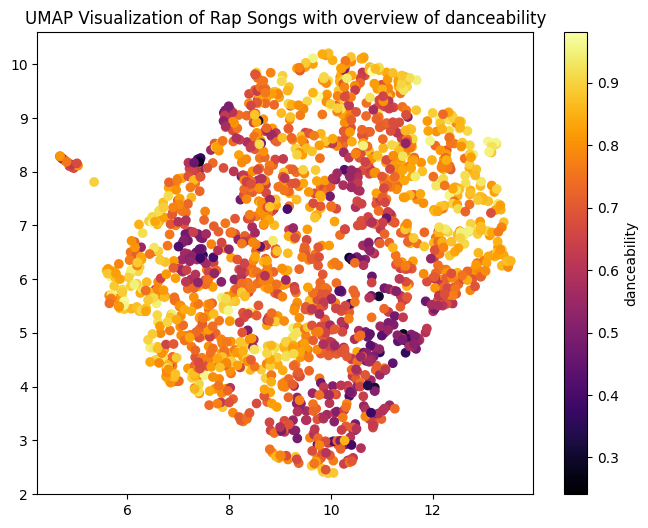

c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


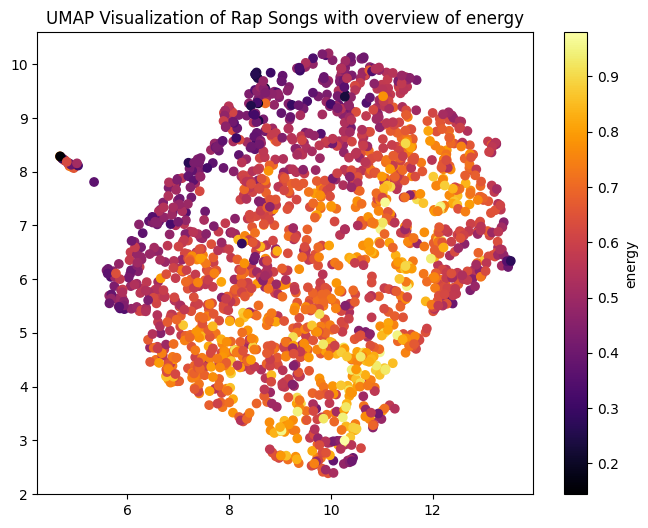

c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


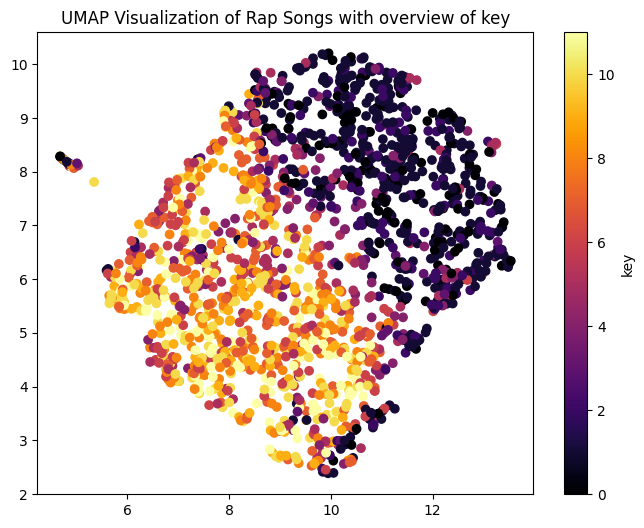

c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


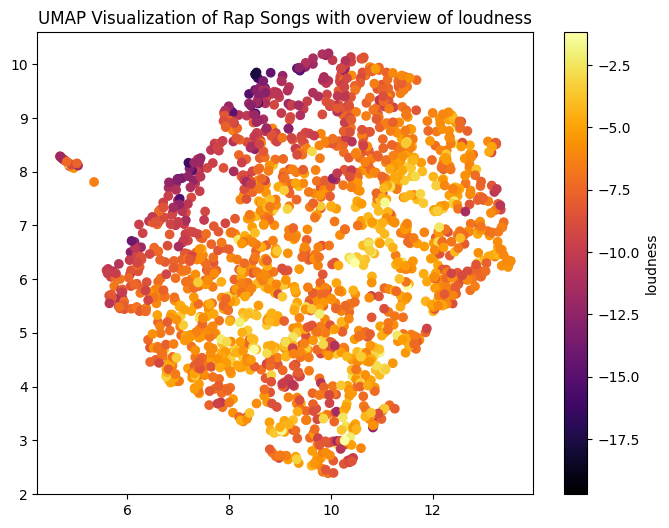

c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


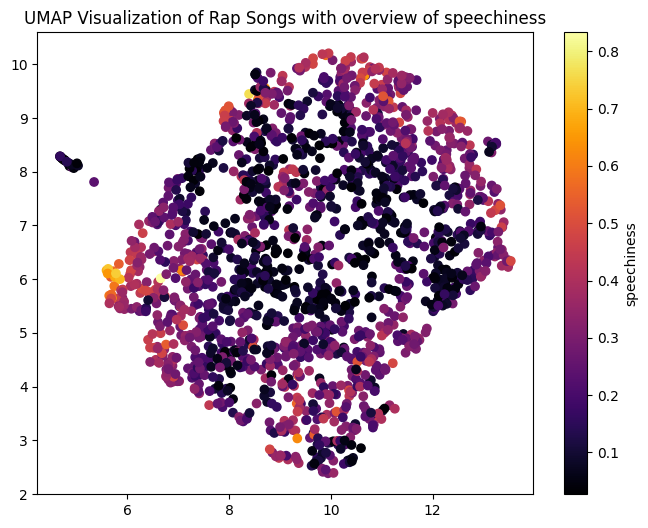

c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


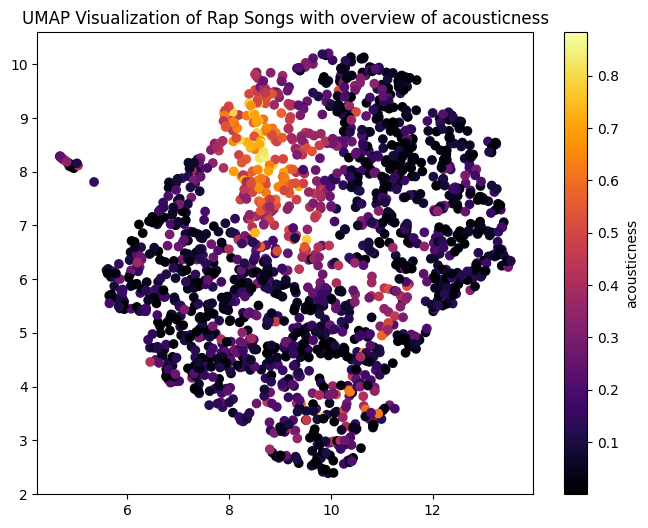

c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


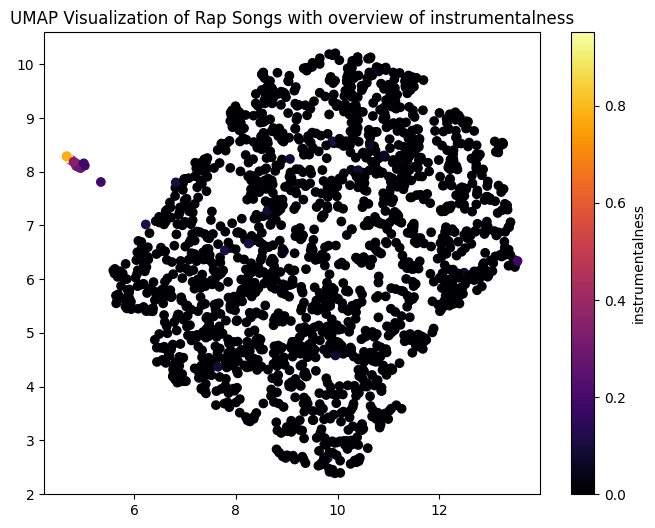

c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


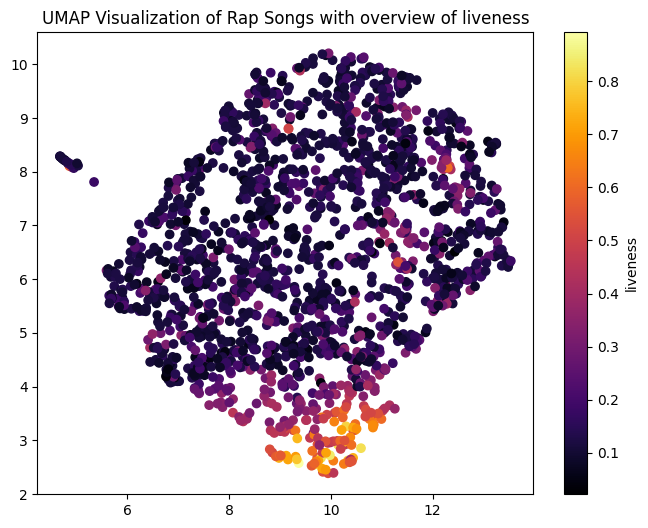

c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


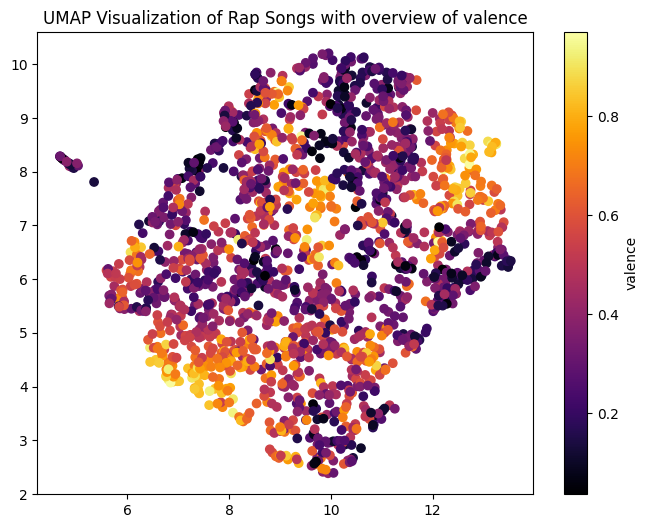

c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


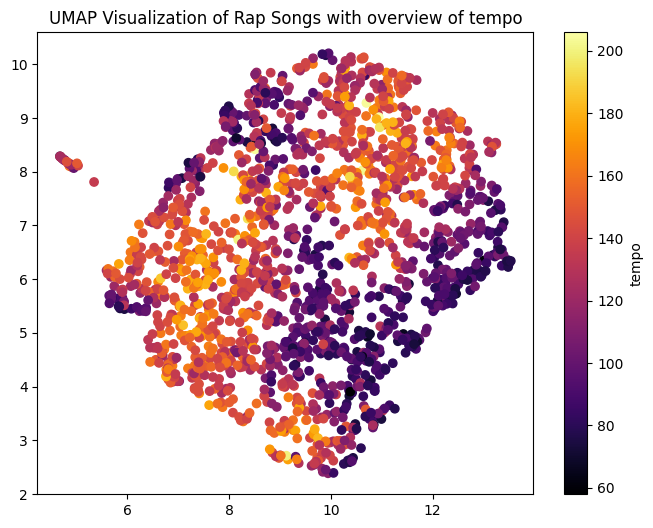

c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


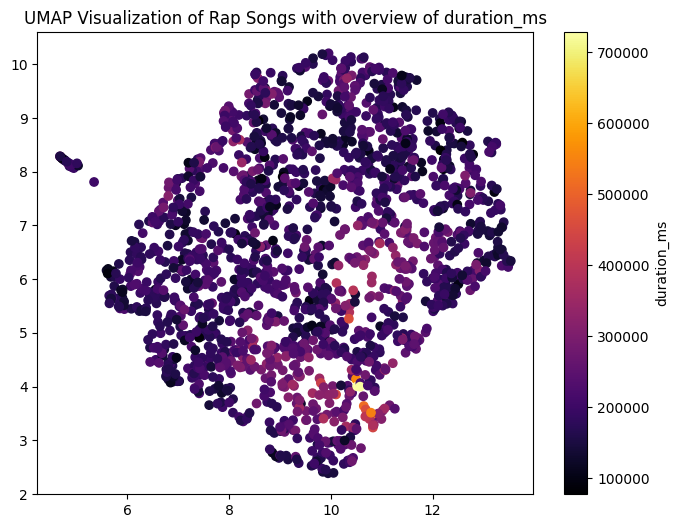

In [13]:
#Plot UMAP of my rap songs:

%matplotlib inline
from sklearn.preprocessing import StandardScaler

def umap_overlay(df):
    X = df.drop(['genre', 'song_name', 'mode', 'time_signature'], axis=1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    for feature in X.columns:
        y = X[feature]
        mapper = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit(X_scaled)
        embedding = mapper.transform(X_scaled)

        # Create a scatter plot of the UMAP embedding
        plt.figure(figsize=(8, 6))
        plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='inferno')
        plt.title(f"UMAP Visualization of Rap Songs with overview of {feature}")
        plt.colorbar(label=feature)
        plt.show()
        
umap_overlay(rap_songs)


In [14]:
numerical_rap_df = rap_songs.drop(['genre', 'song_name'], axis=1)
numerical_rap_df.corr(method='spearman')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.210527,-0.062613,-0.045373,0.045081,0.095141,-0.147540,0.008238,-0.175342,0.171730,-0.023203,-0.198326,0.016028
energy,-0.210527,1.000000,0.068952,0.645941,0.016949,-0.015212,-0.113586,-0.155613,0.147914,0.299819,0.061451,0.115933,0.007019
key,-0.062613,0.068952,1.000000,0.026724,-0.242855,0.038150,0.034194,-0.017416,0.030153,0.110963,0.004293,0.037509,0.012077
loudness,-0.045373,0.645941,0.026724,1.000000,0.024799,-0.098716,-0.149875,-0.155490,0.086746,0.139309,0.064952,0.076807,0.027341
mode,0.045081,0.016949,-0.242855,0.024799,1.000000,0.038937,-0.138787,0.037758,0.023055,-0.061148,-0.002010,-0.047340,-0.012972
speechiness,0.095141,-0.015212,0.038150,-0.098716,0.038937,1.000000,-0.005519,-0.189663,0.022145,0.219417,0.081223,0.006779,0.015069
acousticness,-0.147540,-0.113586,0.034194,-0.149875,-0.138787,-0.005519,1.000000,-0.022762,-0.038867,0.121240,-0.113442,0.003552,-0.007656
instrumentalness,0.008238,-0.155613,-0.017416,-0.155490,0.037758,-0.189663,-0.022762,1.000000,-0.047103,-0.221792,-0.016279,0.065863,-0.010822
liveness,-0.175342,0.147914,0.030153,0.086746,0.023055,0.022145,-0.038867,-0.047103,1.000000,0.042008,-0.021295,0.078912,0.011913
valence,0.171730,0.299819,0.110963,0.139309,-0.061148,0.219417,0.121240,-0.221792,0.042008,1.000000,0.030693,-0.100199,-0.012449


In [15]:
#Start process of making a df of more than just the 'rap' genre
songs_new['genre'].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop'], dtype=object)

In [16]:
selected_genres = ['Dark Trap', 'Underground Rap', 'Trap Metal', 'Rap', 'Pop', 'Hiphop']
multiple_genre_df = songs_new[songs_new['genre'].isin(selected_genres)].copy()
multiple_genre_df['genre'].unique()
multiple_genre_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap,Venom


c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


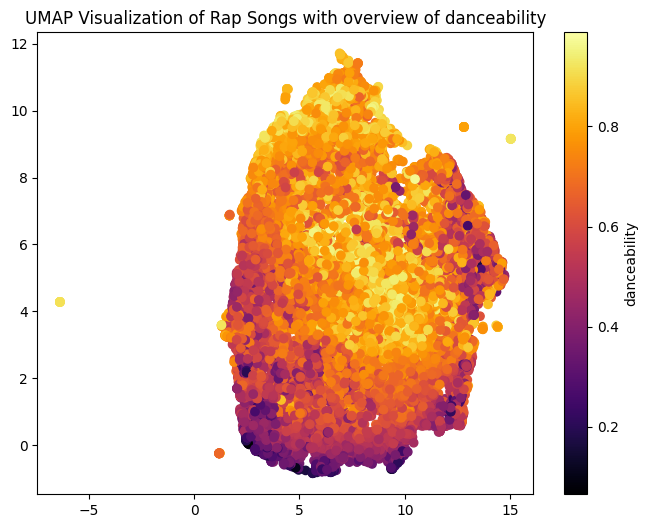

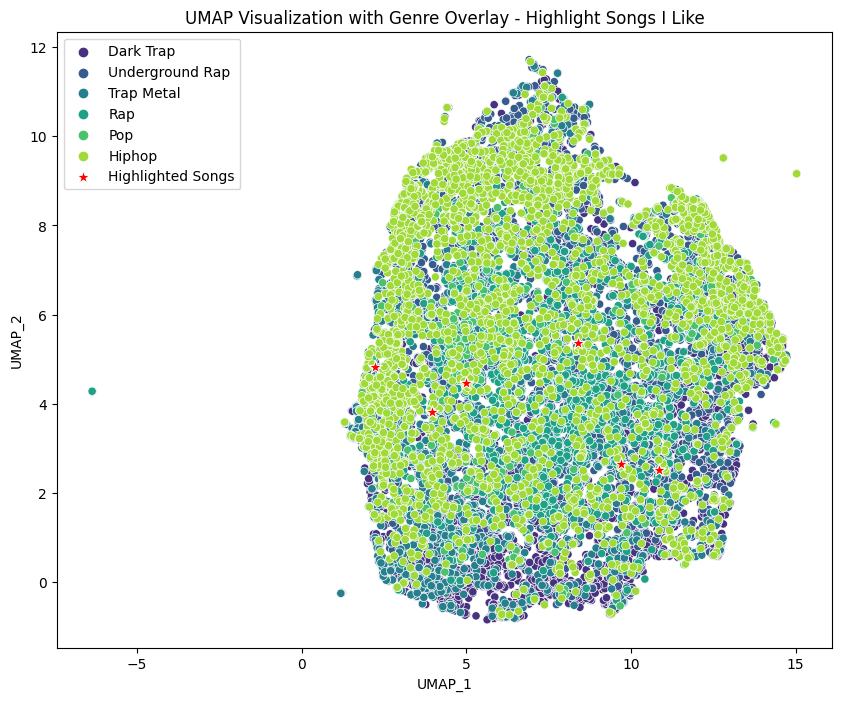

embedding song index:  [array([8.395816, 5.359009], dtype=float32)]
song_index:  7332 indices of neighbors:  [[ 7332  6825 10366 12961  8617]]
Nearest neighbors for Guwop (feat. Quavo, Offset and Young Scooter): ['Guwop (feat. Quavo, Offset and Young Scooter)', 'ball w/o you', "Skin That I'm In", 'ball w/o you', 'Vacation']

embedding song index:  [array([10.851646 ,  2.5223916], dtype=float32)]
song_index:  5398 indices of neighbors:  [[5398  338 8918 5109 8438]]
Nearest neighbors for Perkys Calling: ['Perkys Calling', 'Laps', 'Laps', 'Crazy Story', 'Dead Rose']

embedding song index:  [array([3.9687064, 3.8119376], dtype=float32)]
song_index:  5768 indices of neighbors:  [[ 5768  5409  5238  9170 11884]]
Nearest neighbors for Untouchable: ['Untouchable', 'Russian AK', 'JonathanTaylorThomas', "It's a Bird! It's a Plane!", 'NX CNTRL.']



In [17]:
#Plot UMAP of my multiple genre songs:
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

def new_umap_overlay(df, highlight_song_names=[]):
    df = df.reset_index(drop=True)
    X = df.drop(['genre', 'song_name', 'mode', 'time_signature', 'key', 'liveness', 'instrumentalness', 'duration_ms', 'speechiness'], axis=1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    for feature in X.columns[:1]:
        y = X[feature]
        mapper = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit(X_scaled)
        embedding = mapper.transform(X_scaled)

        # Create a scatter plot of the UMAP embedding
        plt.figure(figsize=(8, 6))
        plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='inferno')
        plt.title(f"UMAP Visualization of Rap Songs with overview of {feature}")
        plt.colorbar(label=feature)
        plt.show()
        
    # Create a DataFrame with UMAP results
    umap_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])
    # Add 'genre' column to UMAP DataFrame for color mapping
    umap_df['genre'] = df['genre']
    umap_df['song_name'] = df['song_name']
    # Plot the UMAP results with color-coded genres
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='genre', data=umap_df, palette='viridis', legend='full')

    # Highlight specific song names
    highlighted_songs = umap_df[umap_df['song_name'].isin(highlight_song_names)]
    sns.scatterplot(x='UMAP_1', y='UMAP_2', data=highlighted_songs, color='red', marker='*', s=100, label='Highlighted Songs')
    plt.title('UMAP Visualization with Genre Overlay - Highlight Songs I Like')
    plt.legend()
    plt.show()

    #Find and Print nearest neighbors for each highlighted song
    nearest_n_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
    nearest_n_model.fit(embedding)

    for song_name in highlight_song_names:
        song_index = umap_df.index[umap_df['song_name'] == song_name].tolist()[0]
        print('embedding song index: ', [embedding[song_index]])
        distances, indices = nearest_n_model.kneighbors([embedding[song_index]])
        print('song_index: ', song_index, 'indices of neighbors: ', indices)
        nearest_neighbors = umap_df['song_name'].iloc[indices[0][:]].tolist()
        print(f"Nearest neighbors for {song_name}: {nearest_neighbors}")
        print()


# highlight_songs = ['La La Land (feat. YG)', 'Sold Out Dates (feat. Lil Baby)']
# highlight_songs = ['War With Us', 'Kacey Talk', 'Young Grizzley World (feat. A Boogie Wit Da Hoodie & YNW Melly)']
highlight_songs = ['Guwop (feat. Quavo, Offset and Young Scooter)', 'Perkys Calling', 'Untouchable']
# highlight_songs = ['X (feat. Future)', 'Kacey Talk', 'Slime Belief', 'Look Alive (feat. Drake)', 'COOLER THAN A BITCH (feat. Roddy Ricch)']
# highlight_songs = ['SideLine Watching (Hold Up)', 'No Money', 'Mood (feat. iann dior)', 'Low Life (feat. The Weeknd)']
# highlight_songs = ['Oh Okay (feat. Young Thug & Lil Baby)', 'Hood Gone Love It (feat. Kendrick Lamar)', 'Trap (feat. Lil Baby)', 'Drip Too Hard (Lil Baby & Gunna)', '1 Thot 2 Thot Red Thot Blue Thot', 'Hot (Remix) [feat. Gunna and Travis Scott]'] 
# highlight_songs = ['Ronda (Winners)', 'CAPO', 'Marvelous Day (feat. Lil Uzi Vert & Gunna)', 'Lil Top', '2 Phones', 'Life Goes On']       
new_umap_overlay(multiple_genre_df, highlight_song_names=highlight_songs)

In [18]:
multiple_genre_df.head()
print(multiple_genre_df['genre'].unique())

['Dark Trap' 'Underground Rap' 'Trap Metal' 'Rap' 'Pop' 'Hiphop']


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Convert genre labels to numerical values using LabelEncoder
le = LabelEncoder()
multiple_genre_df['genre_encoded'] = le.fit_transform(multiple_genre_df['genre'])

# Select features and target variable
features = multiple_genre_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
features = features.drop(columns=['instrumentalness', 'duration_ms'])
print(features.columns)
target = multiple_genre_df['genre_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgboost
# Define a list of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgboost.XGBClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
}

# Iterate through classifiers
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred, target_names=le.classes_)

    # Print results
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    print("-" * 40)

Results for Logistic Regression:
Accuracy: 0.48
Classification Report:
                 precision    recall  f1-score   support

      Dark Trap       0.55      0.63      0.59       916
         Hiphop       0.40      0.22      0.29       591
            Pop       0.41      0.12      0.18        93
            Rap       0.57      0.29      0.38       373
     Trap Metal       0.46      0.18      0.25       401
Underground Rap       0.44      0.68      0.54      1174

       accuracy                           0.48      3548
      macro avg       0.47      0.35      0.37      3548
   weighted avg       0.48      0.48      0.45      3548

----------------------------------------
Results for Support Vector Machine:
Accuracy: 0.50
Classification Report:
                 precision    recall  f1-score   support

      Dark Trap       0.61      0.57      0.59       916
         Hiphop       0.50      0.27      0.35       591
            Pop       0.47      0.08      0.13        93
            